# **Libraries We'll Be Using**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# **Loading SVHN Training and Testing Data (Format 2: Cropped Digits)**


1.   Load the SVHN Dataset
2.   Create training and testing sets
3.   Output image previews from loaded dataset





**Loading and Train/Test Creation**

In [0]:
# little helper function to load SVHN dataset from argument path
def load_data(path):
  data = loadmat(path)
  return data['X'], data['y']
  

# get the SVHN training and testing sets
X_train, y_train = load_data('train_32x32')
X_test, y_test = load_data('test_32x32')


# change the order of elements in training/testing image arrays
# (width, height, channels, size) -> (size, width, height, channels)
# size = number of images
# width = image width (pixels)
# height = image height (pixels)
# channels = color scheme (3 = rgb, 1 = grayscale)
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]


# check the training/testing dimensions
print('Training X Shape: ', X_train.shape)
print('Training Y Shape: ', y_train.shape)
print('Testing X Shape: ', X_test.shape)
print('Testing Y Shape: ', y_test.shape)

Training X Shape:  (73257, 32, 32, 3)
Training Y Shape:  (73257,)
Testing X Shape:  (26032, 32, 32, 3)
Testing Y Shape:  (26032,)


**Image Previews**

(-0.5, 31.5, 31.5, -0.5)

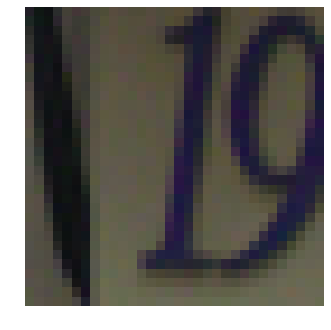

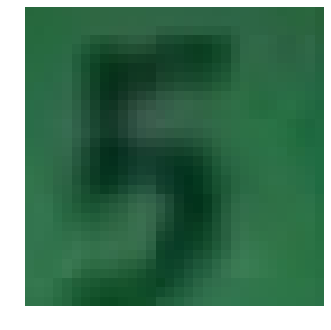

In [0]:
# get an image from the training and testing sets
train_img = X_train[0,:].reshape((32,32,3), order='F')
test_img = X_test[0,:].reshape((32,32,3), order='F')

# plot the training image
plt.figure(1)
plt.imshow(train_img)
plt.axis('off')

# plot the testing image
plt.figure(2)
plt.imshow(test_img)
plt.axis('off')

# **Data Preprocessing**


1.   Re-label training and testing data set (change 10 labels to 0)
2.   Create a training validation set
3.   Convert the datasets from RGB to grayscale
4.   Normalize the converted datasets





**Re-label the training testing sets and create a training validation set**

In [0]:
# re-label 10 to 0 in the dataset
y_train[y_train == 10] = 0
y_test [y_test == 10] = 0


# create a validation set from the training set
# currently using an 80/20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Convert the training, testing, and validation sets fro *RGB* to *grayscale* **

In [0]:
# helper function to convert image arrays from rgb to grayscale
# can convert from RGB to grayscale using the function: 
# Y = (0.299 * R) + (0.587 * G) + (0.114 * B)
def gray_conv(img):
  r = 0.299
  g = 0.587
  b = 0.114
  grayscale_img = np.expand_dims(np.dot(img, [r,g,b]), axis = 3)
  return grayscale_img


# get a grayscale version of the training, testing, and validation sets
# grayscale images will be faster to perform computations on and should
# help our model generalize better
train_gscale = gray_conv(X_train).astype(np.float32)
test_gscale = gray_conv(X_test).astype(np.float32)
val_gscale = gray_conv(X_val).astype(np.float32)

#delete the RGB image sets
del X_train, X_test, X_val

**Normalize the grayscale datasets**

In [0]:
# normalize the grayscale datasets

# get the mean and standard deviation from the training set
mean = np.mean(train_gscale, axis=0)
std = np.std(train_gscale, axis=0)

# perform the normalization
train_gscale_norm = (train_gscale - mean) / std
test_gscale_norm = (test_gscale - mean)  / std
val_gscale_norm = (val_gscale - mean) / std

# **Perform One Hot Encoding for CNN Classifier**

In [0]:
# apply one hot encoding to the data labels
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()


# check the label dimensions
print('Training Labels', y_train.shape)
print('Testing Labels', y_test.shape)
print('Validation Labels', y_val.shape)

Training Labels (58605, 10)
Testing Labels (26032, 10)
Validation Labels (14652, 10)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# **Export Preprocessed Data**

In [0]:
# make the file
h5f = h5py.File('SVHN_Preprocessed_Single.h5', 'w')

# store training, testing, and validation sets
h5f.create_dataset('X_train', data=train_gscale_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_gscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=val_gscale_norm)
h5f.create_dataset('y_val', data=y_val)

# close the file
h5f.close()